In [2]:
# a first implementation of an "event density" descriptor as proposed by Madison et al. in their paper 'Modeling the Tendency for Music to Induce Movement in Humans'
%matplotlib inline
import essentia 
from essentia.standard import *
from essentia import Pool
import os
import matplotlib.pyplot as plt
import numpy as np
import csv
import itertools
import pandas as pd
import seaborn as sns

In [3]:
with open('event_density.csv', 'wb') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',')
    i = -3
    
    for file in os.listdir('sounds/drummer3/'):

        beats=[]
        sl = []
        energy_var = []
        beat_energy =[]
        beat_density = []

        if '.wav' not in file: continue
        filename = file
        load_file = 'sounds/drummer3/' + filename  

        # load audio 
        loader = MonoLoader(filename=load_file)
        audio = loader()

        #tracking beats
        bt = BeatTrackerMultiFeature()
        beats, _ = bt(audio)

        #audio segmentation into beats

        for i in range(len(beats)-2):
            segStart = int(beats[i] * 44100)
            segEnd = int(beats[i+1]*44100)
            sl.append(audio[segStart:segEnd])

        # energy variance on beat segments
        energy = Energy()

        for i in range(len(beats)-2):
            beat_energy = energy(sl[i])
            energy_var.append(beat_energy)

        # mean of energy variance:
        beat_density = np.mean(energy_var)
        i += 1
        spamwriter.writerow([filename, beat_density])

# DISCO 

3 drummers

6 samples (simple - complex // slow - fast)

In [3]:
# drummer onset/beat
# drummer event density

drummer1_os = [4.21,6.07,6.27,5.58,5.63,7.94]
drummer2_os = [4.467,5.223,5.556,5.357,5.066,5.220]
drummer3_os = [5.254,6.142,6.031,6.512,7.348,8.532]
drummer1_ob = [1.50,3.63,3.29,3.76,3.12,3.88]
drummer2_ob = [1.722,3.389,2.900,2.000,3.389,2.639]
drummer3_ob = [2.90,3.00,2.76,3.82,3.70,3.64]
drummer1_ed = [20.519, 65.881, 145.994,289.685,277.883,892.654] 
drummer2_ed = [108.431,214.642,221.770,110.816,235.236,188.389]
drummer3_ed = [177.663,178.326,172.556,229.489,206.546,210.599]

In [39]:
def comparison_plot(var1,var2,var3,title, size):
    t = np.arange(size)
    handles = 'sim_slow','sim_med','sim_fast','com_slow','com_med','com_fast'
    plt.title(title)
    plt.plot(t+1, var1, 'r', label='drummer1')
    plt.plot(t+1, var2, 'g', label='drummer2')
    plt.plot(t+1, var3, 'b', label='drummer3')
    plt.legend()
    figure = title +'.jpg'
    plt.savefig(figure)
    plt.xlabel(handles)

In [13]:
d = {'col1': drummer1_os, 'col2': drummer2_os, 'col3': drummer3_os}
df = pd.DataFrame(data=d)

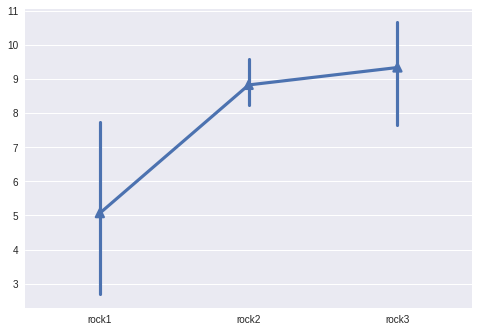

In [23]:
sns.pointplot(data=df, markers=["^", "o"], linestyles=["-", "--"])

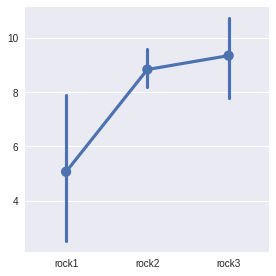

In [24]:
sns.factorplot(data = df)

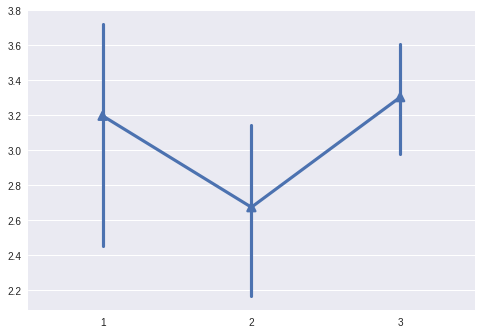

In [18]:
d = {'1': drummer1_ob, '2': drummer2_ob, '3': drummer3_ob}
df = pd.DataFrame(data=d)
sns.pointplot(data=df, markers=["^", "o"], linestyles=["-", "--"])

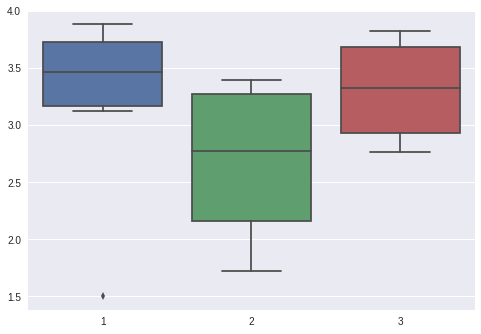

In [19]:
sns.boxplot(df)

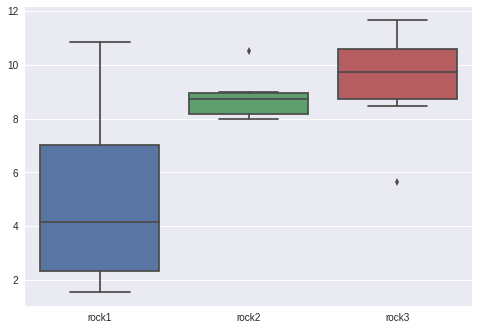

In [21]:
drummer1_os = [1.54,
2.30,
2.48,
5.80,
7.42,
10.86
]
drummer2_os = [7.987,
8.521,
10.530,
8.036,
8.911,
8.985,

]
drummer3_os = [5.631,
8.481,
9.520,
9.957,
10.793,
11.652

]
d = {'rock1': drummer1_os, 'rock2': drummer2_os, 'rock3': drummer3_os}
df = pd.DataFrame(data=d)
sns.boxplot(df)

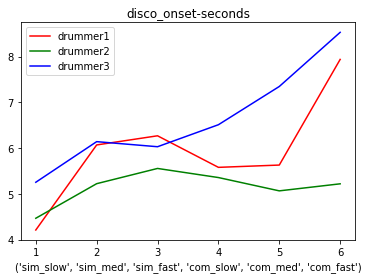

In [40]:
comparison_plot(drummer1_os,drummer2_os,drummer3_os, 'disco_onset-seconds',6)

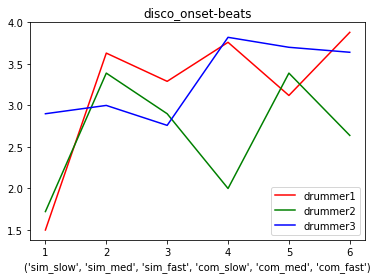

In [41]:
comparison_plot(drummer1_ob,drummer2_ob,drummer3_ob, 'disco_onset-beats',6)

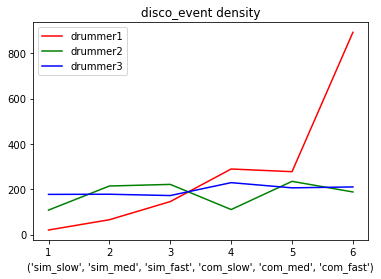

In [42]:
comparison_plot(drummer1_ed,drummer2_ed,drummer3_ed, 'disco_event density',6)

# 2 // ROCK

- 3 drummers

- 6 samples (simple - complex // slow - fast)

In [43]:
drummer1_os = [1.11,
1.21,
2.5,
1.62,
3.12,
6
]
drummer2_os = [4.245,
4.774,
6.291,
5.220,
5.500,
6.572
]
drummer3_os = [4.371,
5.658,
4.707,
6.963,
6.806,
8.574
]
drummer1_ob = [1.11,1.21,2.50,1.62,3.12,6.00]
drummer2_ob = [3.115,
3.056,
2.655,
3.654,
2.895,
2.757
]
drummer3_ob = [2.828,
2.867,
2.741,
4.256,
3.391,
4.612
]
drummer1_ed = [409.683,
396.352,985.06,933.778,1720.356,2720.076
] 
drummer2_ed = [201.919,
192.349,
173.541,
236.241,
181.146,
199.011
]
drummer3_ed = [178.964,
157.870,
225.828,
257.030,
162.201,
311.314
]

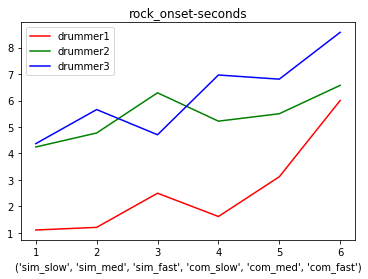

In [44]:
comparison_plot(drummer1_os,drummer2_os,drummer3_os, 'rock_onset-seconds',6)

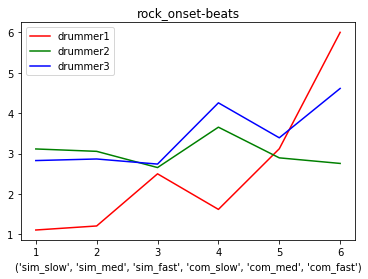

In [45]:
comparison_plot(drummer1_ob,drummer2_ob,drummer3_ob, 'rock_onset-beats',6)

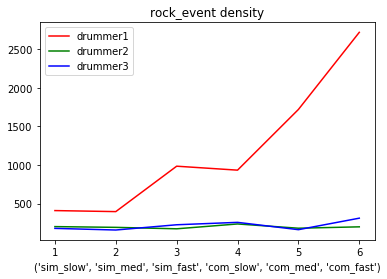

In [46]:
comparison_plot(drummer1_ed,drummer2_ed,drummer3_ed, 'rock_event density',6)

# AFRO

- 3 drummers: drummer 1 uses mallets, drummer 2 and 3 sticks
- 6 samples (simple - complex // slow - fast)

In [47]:
drummer1_os = [1.54,
2.30,
2.48,
5.80,
7.42,
10.86
]
drummer2_os = [7.987,
8.521,
10.530,
8.036,
8.911,
8.985,

]
drummer3_os = [5.631,
8.481,
9.520,
9.957,
10.793,
11.652

]
drummer1_ob = [
    0.71,
1.32,
1.19,
2.75,
3.84,
3.76
]
drummer2_ob = [5.057,
4.818,
4.633,
4.974,
4.186,
3.928

]
drummer3_ob = [2.222,
5.75,
5.227,
5.825,
5.119,
5.295
]

drummer1_ed = [4.486,27.037,106.673,85.553,453.536,371.747] 
drummer2_ed = [659.838,
590.143,
607.627,
548.446,
518.631,
420.489

]
drummer3_ed = [89.205,
153.425,
132.407,
245.299,
224.453,
207.749]

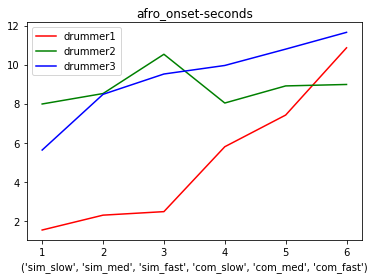

In [48]:
comparison_plot(drummer1_os,drummer2_os,drummer3_os, 'afro_onset-seconds',6)

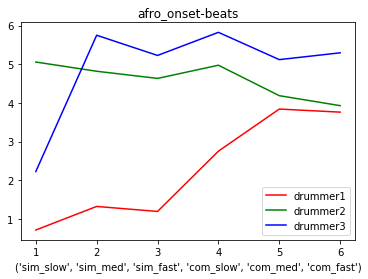

In [49]:
comparison_plot(drummer1_ob,drummer2_ob,drummer3_ob, 'afro_onset-beats',6)

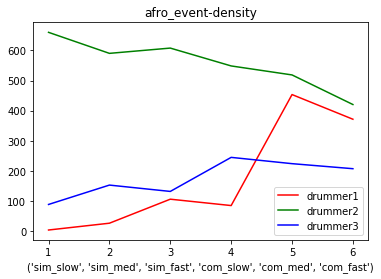

In [50]:
comparison_plot(drummer1_ed,drummer2_ed,drummer3_ed, 'afro_event-density',6)

# 3 // SHUFFLE BLUES
- 3 drummers
- 6 samples (simple - complex // slow - fast)

In [51]:


drummer1_os = [4.2,
4.59,
4.56,
5.82,
9.57,
11.79

]
drummer2_os = [3.95,
4.212,
8.612,
5.546,
7.07,
8.961

]
drummer3_os = [6.093,
7.838,
11.093,
7.466,
10.608,
10.791


]
drummer1_ob = [
3.22,
2.32,
1.92,
3.47,
3.89,
8.82

]
drummer2_ob = [3.727,
3.263,
3.962,
4,
3.825,
3.473


]
drummer3_ob = [3.593,
3.806,
6.381,
3.771,
4.347,
6.121

]

drummer1_ed = [63.677,
19.817,
7.174,
43.283,
43.32,
150.204,
] 
drummer2_ed = [268.065,
244.071,
181.071,
362.3,
281.992,
227.992,


]
drummer3_ed = [92.968,
109.59,
201.221,
175.322,
184.042,
226.962
]

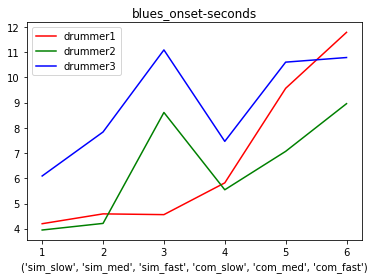

In [52]:
comparison_plot(drummer1_os,drummer2_os,drummer3_os, 'blues_onset-seconds',6)

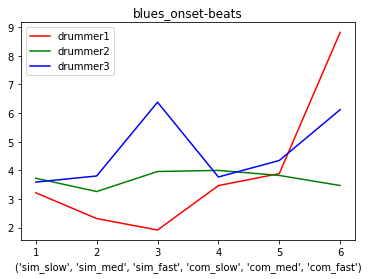

In [53]:
comparison_plot(drummer1_ob,drummer2_ob,drummer3_ob, 'blues_onset-beats',6)

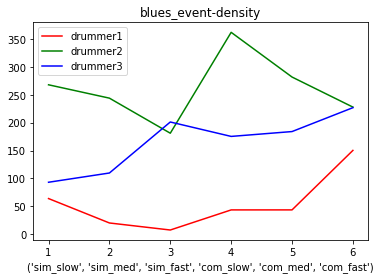

In [54]:
comparison_plot(drummer1_ed,drummer2_ed,drummer3_ed, 'blues_event-density',6)

# 4 // SOLO
- 3 drummers
- 3 different solos

In [55]:
drummer1_os = [4.04,
8.61,
7.89]
drummer2_os = [8.287,
10.849,
6.413]
drummer3_os = [9.187,
4.281,
8.795]
drummer1_ob = [
2.15,
3.82,
2.99]
drummer2_ob = [3.734,
4.543,
2.891]
drummer3_ob = [9.187,
4.281,
8.795]
drummer1_ed = [138.072,
652.889,
1346.148] 
drummer2_ed = [208.518,
603.547,
51.463]
drummer3_ed = [157.32,
76.157,
189.744]

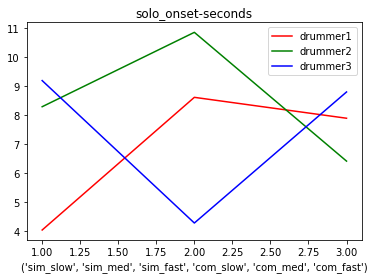

In [56]:
comparison_plot(drummer1_os,drummer2_os,drummer3_os, 'solo_onset-seconds',3)

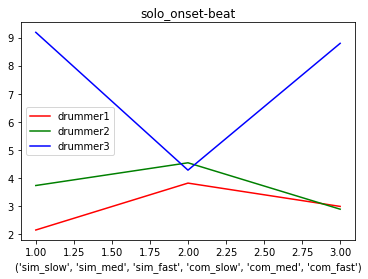

In [57]:
comparison_plot(drummer1_ob,drummer2_ob,drummer3_ob, 'solo_onset-beat',3)

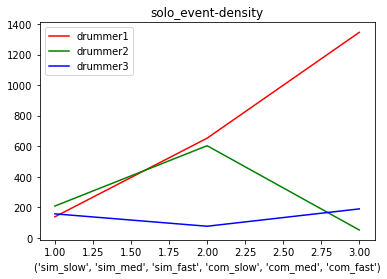

In [58]:
comparison_plot(drummer1_ed,drummer2_ed,drummer3_ed, 'solo_event-density',3)

# 5 // MINUS ONE
- 3 drummers
- 8 samples> salsa, rock, metal, musette, funky, charleston, celtic rock, bossa

In [59]:
drummer1_os = [10.28,
9.67,
6.97,
5.53,
7.42,
4.98,
6.1,
9.09,
6.73]
drummer2_os = [8.49,
6.583,
6.175,
3.998,
6.963,
6.203,
12.998,
7.011,
6.552]
drummer3_os = [9.626,
7.911,
6.978,
7.344,
8.551,
5.764,
9.477,
8.665,
6.535]
drummer1_ob = [
6.22,
4.5,
4.67,
2.39,
4.08,
2.16,
3.57,
3.91,
3.38]
drummer2_ob = [5.125,
3.092,
4.215,
1.74,
3.817,
2.686,
7.563,
3.015,
3.312]

drummer3_ob = [5.826,
3.665,
2.478,
3.179,
4.695,
2.497,
5.504,
5.61,
3.298]

drummer1_ed = [147.233,
506.382,
1020.441,
11.51,
341.369,
225.102,
33.64,
57.144,
34.119] 
drummer2_ed = [255.395,
172.388,
299.449,
24.344,
158.189,
114.97,
175.615,
55.312,
85.512]
drummer3_ed = [198.764,
144.275,
125.272,
40.746,
169.523,
87.596,
126.818,
131.625,
67.763]

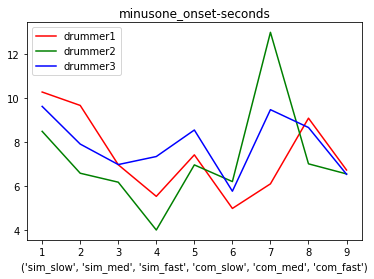

In [60]:
comparison_plot(drummer1_os,drummer2_os,drummer3_os, 'minusone_onset-seconds',9)

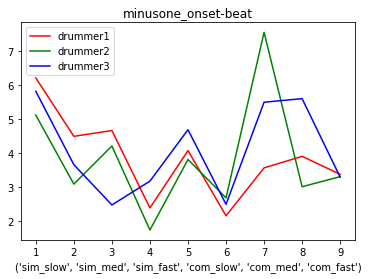

In [61]:
comparison_plot(drummer1_ob,drummer2_ob,drummer3_ob, 'minusone_onset-beat',9)

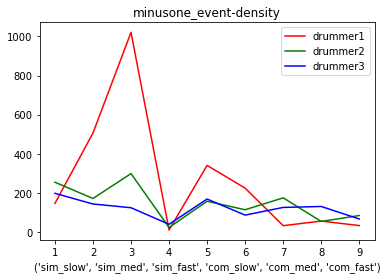

In [62]:
comparison_plot(drummer1_ed,drummer2_ed,drummer3_ed, 'minusone_event-density',9)

# 6 // MIDI
3 drummers

In [63]:
drummer1_os = [6.7,
6.71,
17.28,
6.62,
7.03,
6.75,
6.26,
7.8,
5.05,
15.45,
4.87,
3.66]
drummer2_os = [7.455,
6.709,
5.249,
6.036,
5.59,
5.713,
5.947,
4.898,
7.466,
5.176,
4.767,
5.471


]
drummer3_os = [5.751,
7.884,
7.342,
7.347,
8.188,
7.615,
8.025,
5.936,
10.067,
7.637,
6.396,
6.823

]
drummer1_ob = [
3.16,
3.83,
8.81,
3.71,
4.24,
3.42,
3.72,
4.17,
3.25,
7.82,
3,
2.25


]
drummer2_ob = [3.529,
3.814,
2.638,
3.424,
3.329,
2.874,
3.482,
2.6,
2.405,
2.628,
2.964,
2.22]

drummer3_ob = [2.725,
4.508,
3.721,
4.118,
4.923,
3.831,
4.69,
3.155,
6.517,
3.864,
3.97,
2.729]

drummer1_ed = [7.756,
36.669,
14.32,
89.788,
513.936,
154.013,
231.737,
87.866,
152.613,
92.177,
43.688,
572.733


] 
drummer2_ed = [100.731,
164.005,
74.28,
182.277,
129.808,
231.756,
157.131,
144.151,
134.193,
144.675,
104.123,
130.414


]
drummer3_ed = [32.365,
168.532,
105.514,
131.571,
153.09,
157.243,
121.457,
133.058,
157.843,
104.541,
71.163,
161.924

]

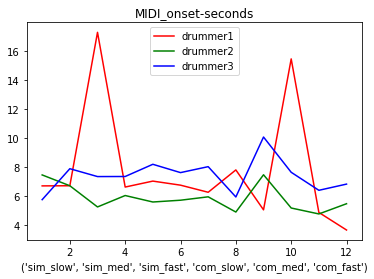

In [64]:
comparison_plot(drummer1_os,drummer2_os,drummer3_os, 'MIDI_onset-seconds',12)

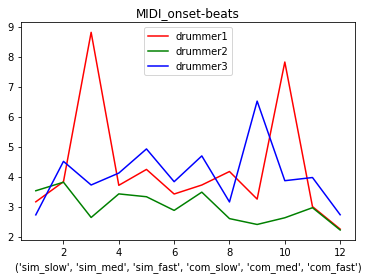

In [65]:
comparison_plot(drummer1_ob,drummer2_ob,drummer3_ob, 'MIDI_onset-beats',12)

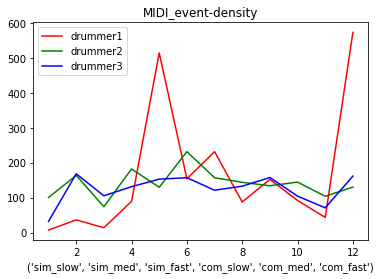

In [66]:
comparison_plot(drummer1_ed,drummer2_ed,drummer3_ed, 'MIDI_event-density',12)

---------------------------------------------

# 7 // SALSA

- 2 drummers
- 6 samples (simple - complex // slow - fast)

In [69]:
def comparison_plot13(var1,var2,title, size):
    t = np.arange(size)
    handles = 'sim_slow','sim_med','sim_fast','com_slow','com_med','com_fast'
    plt.title(title)
    plt.plot(t+1, var1, 'r', label='drummer1')
    plt.plot(t+1, var2, 'g', label='drummer3')
    plt.legend()
    figure = title +'.jpg'
    plt.savefig(figure)
    plt.xlabel(handles)

In [72]:
drummer1_os = [2.86,
4.8,
6.02,
5.12,
7.95,
9.86]

drummer3_os = [6.526,
9.428,
6.956,
7.055,
8.793,
10.645
]
drummer1_ob = [
1.57,
2.7,
2.37,
2.44,
5.42,
4.5]

drummer3_ob = [4.194,
4.844,
3.366,
4.452,
4.914,
4.911


]
drummer1_ed = [6.725,
11.329,
16.728,
194.147,
224.123,
382.775
] 
drummer3_ed = [63.065,
98.471,
140.542,
89.001,
104.785,
148.582
]

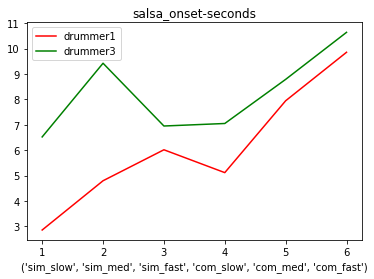

In [73]:
comparison_plot13(drummer1_os,drummer3_os, 'salsa_onset-seconds',6)

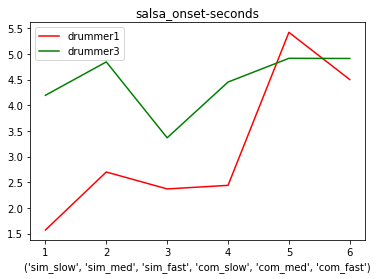

In [74]:
comparison_plot13(drummer1_ob,drummer3_ob, 'salsa_onset-seconds',6)

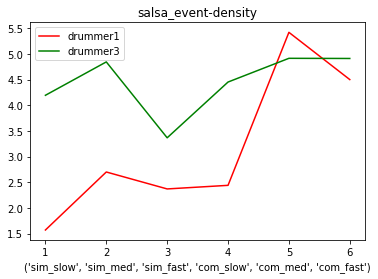

In [75]:
comparison_plot13(drummer1_ob,drummer3_ob, 'salsa_event-density',6)

In [15]:
# 8 // Hard rock
- 2 drummers 
- 6 samples

In [ ]:
# 9 // Reggae
- 2 drummers
- 6 samples

In [ ]:
# 10 // Waltz
- 2 drummers
- 6 samples

In [ ]:
# 11 Country
# 12 Oriental
# 13 Cha cha